In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

In [16]:
'''
This script finds a numerical approximation for the solution to
 the following 1D heat equation with Neumann conditions:
   u_t = u_xx  for  x \in (0,1),  t \in (0,T),
   u(x,t=0) = x,
   u'(x=0,t) = 0, u'(x=1,t) = 0,
 using a backward Euler scheme.
''' 
def U_exact2(x,t):
    M = np.size(x)
    u_ex = 0.5*np.ones(M)  
            
    for s in range(1,1000,2):
        npi= s*np.pi
        c_n = -(4.0)/npi/npi                            
        u_ex = u_ex + c_n*np.cos(npi*x)*np.exp(-1*npi*npi*t)
        
    return u_ex

In [24]:
# perform initial set up for number of points in time and space
L=3.0; T=1.0
Initial_Water = 25.0
Initial_Metal = 750.0
Rod_Begin=1
Rod_End=2
Nx_spaces = 30; Nt_gaps = 50; 
Nx_points = Nx_spaces +  1 ; Nt_points = Nt_gaps + 1
x = np.linspace(0, L, Nx_points)
print(x)   # mesh points in space


dx = x[1] - x[0]

t = np.linspace(0, T, Nt_points) # mesh points in time
dt = t[1] - t[0]
print()
C = dt/dx**2
print("dx=",dx, "dt=", dt,"C =",C)

# set up structures to hold U and U_ex2 and interim arrays
u   = np.zeros(Nx_points)
u_old = np.zeros(Nx_points)
U = np.zeros((Nx_points,Nt_points))
U_ex2 = np.zeros((Nx_points,Nt_points))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]

dx= 0.1 dt= 0.02 C = 1.9999999999999996


In [26]:
# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

# set up the matrix A
for i in range(1, Nx_points-1): # rows from 1 to Nx-2
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1 + 2*C
A[0,0] = 1+2*C  ; A[0,1]= -2*C 
A[Nx_points-1,Nx_points-1] = 1+2*C 
A[Nx_points-1,Nx_points-2] = -2*C

# find the inverse of A and use for all points
Ainv = np.linalg.inv(A)

# function for setting the initial condition in space  I(x)
def I2(x):
    I_x=np.zeros(np.size(x))
    for i in range(np.size(x)):
        if x[i] >Rod_Begin and x[i]< Rod_End:
            I_x[i]= Initial_Metal
        else:
            I_x[i]= Initial_Water
    return I_x

# Set initial condition u(x,0) = I(x)
u_old = I2(x) # no dirichlet boundary conditions in this example
print(u_old)
# initialise matrices U and U_ex2 for first time step
U[:,0] = u_old[:]
U_ex2[:,0]=U_exact2(x,0)

#perform time=stepping
for n in range(1, Nt_points): # timestep for 1 to t = T-1 so last step finishes on t=T
    # Compute b and solve linear system
    b[:] = u_old[:]
    u[:] = np.dot(Ainv,b)
    # Update u_1 before next step
    u_old = u
    U[:,n] = u
    U_ex2[:,n]=U_exact2(x,t[n])

[ 25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25. 750. 750. 750.
 750. 750. 750. 750. 750. 750.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.]


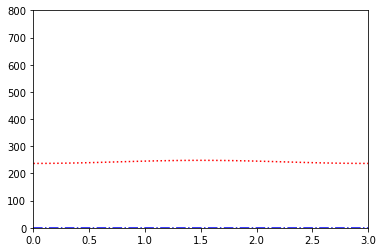

In [27]:
# set up animation plots
fig, ax = plt.subplots()
ax.axis([0,3,0,800])
def animate(i):
    l.set_data(x, U[:,i])
    m.set_data(x,U_ex2[:,i])
    
ax.axis([0,3,0,800.0])
l, = ax.plot([],[],':r')
m, = ax.plot([],[],'-.b')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, frames=Nt_points)

from IPython.display import HTML
HTML(ani2.to_jshtml())